In [73]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import collections
import sqlite3
from pathlib import Path
Path('CCBank.db').touch()


In [74]:
customers = pd.read_csv(r'C:\Users\gerry\Documents\Case Study 2\archive\Customer Acqusition.csv')
repayment = pd.read_csv(r'C:\Users\gerry\Documents\Case Study 2\archive\Repayment.csv')
spend = pd.read_csv(r'C:\Users\gerry\Documents\Case Study 2\archive\spend.csv')


In [75]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [76]:
customers.head(5)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [89]:

print(customers['Product'].value_counts())


Gold        38
Platimum    32
Silver      30
Name: Product, dtype: int64


In [90]:
print(customers['Segment'].value_counts())

Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64


In [91]:
print(customers['City'].value_counts())

COCHIN        20
BANGALORE     19
CALCUTTA      18
BOMBAY        14
CHENNAI        8
PATNA          7
DELHI          7
TRIVANDRUM     7
Name: City, dtype: int64


In [94]:
customers['Age'].describe()

count    100.000000
mean      46.490000
std       18.282572
min       12.000000
25%       33.750000
50%       46.500000
75%       60.250000
max       79.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

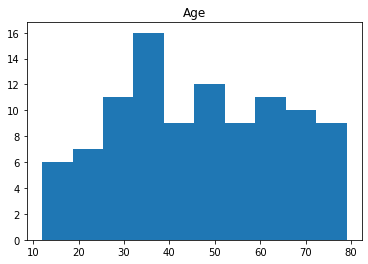

In [96]:
plt.hist(customers['Age'])
plt.title('Age')

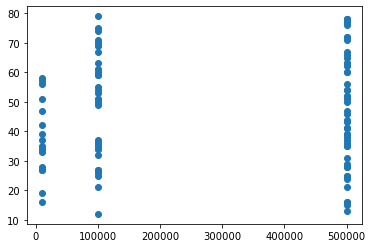

In [100]:
plt.scatter(customers['Limit'],customers['Age'])

In [46]:
repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [51]:
repayment.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [47]:
spend.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [48]:
conn = sqlite3.connect('CCBank.db')
c = conn.cursor()
c.execute('CREATE TABLE customers ([No] int, [Customer] text, [Age] int, [City] text, [Product] text, [Limit] integer, [Company] text, [Segment] text)')



In [49]:
c.execute('SELECT * FROM customers')

In [50]:
customers.to_sql('customers', conn, if_exists='append', index = False)

In [53]:
c.execute('CREATE TABLE repayment ([SL No:] int, [Customer] text, [Month] text, [Amount] int, [Unnamed: 4] int)')

In [54]:
repayment.to_sql('repayment', conn, if_exists='append', index = False)

C:\Users\gerry\anaconda3\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [55]:
c.execute('CREATE TABLE spend ([Sl No:] int, [Customer] text, [Month] text, [Type] text, [Amount] int)')

In [56]:
spend.to_sql('spend', conn, if_exists='append', index = False)

In [59]:
c.execute('SELECT * FROM customers LIMIT 5').fetchall()

[(1, 'A1', 76, 'BANGALORE', 'Gold', 500000, 'C1', 'Self Employed'),
 (2, 'A2', 71, 'CALCUTTA', 'Silver', 100000, 'C2', 'Salaried_MNC'),
 (3, 'A3', 34, 'COCHIN', 'Platimum', 10000, 'C3', 'Salaried_Pvt'),
 (4, 'A4', 47, 'BOMBAY', 'Platimum', 10001, 'C4', 'Govt'),
 (5, 'A5', 56, 'BANGALORE', 'Platimum', 10002, 'C5', 'Normal Salary')]

In [60]:
c.execute('SELECT * FROM repayment LIMIT 5').fetchall()

[(None, 'A1', '12-Jan-04', 495414.75, None),
 (2, 'A1', '3-Jan-04', 245899.02, None),
 (3, 'A1', '15-Jan-04', 259490.06, None),
 (4, 'A1', '25-Jan-04', 437555.12, None),
 (5, 'A1', '17-Jan-05', 165972.88, None)]

In [61]:
c.execute('SELECT * FROM spend LIMIT 5').fetchall()

[(1, 'A1', '12-Jan-04', 'JEWELLERY', 485470.8),
 (2, 'A1', '3-Jan-04', 'PETRO', 410556.13),
 (3, 'A1', '15-Jan-04', 'CLOTHES', 23740.46),
 (4, 'A1', '25-Jan-04', 'FOOD', 484342.47),
 (5, 'A1', '17-Jan-05', 'CAMERA', 369694.07)]